# Домашнее задание №2


Перед вами датасет с данными о вреде курения


Структура данных:

1. **gender**: Пол пациента
2. **age**: Возраст пациента
3. **hypertension**: Наличие гипертонии у пациента 1 - есть, 0 - не наблюдалось
4. **heart_disease**: Наличие у пациента болезней связанных с сердцем 1 - есть, 0 - здоров
5. **ever_married**: Брак - (Состоял в браке/ холост)
6. **work_type**: Работ - Ребенок(children), Госслужащий(Govt_jov), Никогда не работал(Never_worked), Самозанятый(self-employed) или Скрыто(private)
7. **Residence_type**: место работы городская среда(Urban)/удаленка или за городом(Rural)
8. **avg_glucose_level**: средний уровень глюкозы в крови
9. **bmi**: индекс массы тела
10. **smoking_status**: Пациент курит(Иногда, всегда, время от времени или Unknown - неизвестно)
11. **stroke**: Перенесенный инсульт (1 - пациент перенес инсульт, 0 - инсульта не было) - *ваш target*

## Ваша задача

№1 Восстановить целостностью данных, реализовать функцию позволяющие выполнять заполнение данных по среднему или по медианному значению в Series. 

1.  Заполнить пропуски
2.  Убрать дубликаты
3.  Убрать некорректные данные и.т.п.


№2 Построить baseline-модель, попытаться выбить лучший скор (сравнить несколько моделей)

№3 Сделать визуализацию для мини-исследования о вреде курения с разбивкой по половой принадлежности пациентов с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [23]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt

In [25]:
url = 'https://drive.google.com/file/d/1He5GI5_Gd8uXYfeETLBISQ5BszX0o4pU/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url,names=['index','gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'])
data = data.drop('index',axis=1)

In [26]:
data.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,Male,67.0,0.0,1.0,Yes,Private,Urban,228.69,NaN,formerly smoked,1
3,Female,61.0,0.0,0.0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
4,Male,80.0,0.0,1.0,Yes,Private,NaN,105.92,32.5,never smoked,1
5,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
6,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
7,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
8,Male,74.0,1.0,1.0,Yes,NaN,Rural,70.09,NaN,never smoked,1
9,Female,69.0,0.0,NaN,No,Private,Urban,94.39,22.8,never smoked,1


In [27]:
print(data.shape)
dropped = data.copy().dropna().drop_duplicates()
dropped = dropped[dropped['gender'] != 'gender']
dropped.reset_index(inplace=True, drop=True)
print(dropped.shape)

(5112, 11)
(2754, 11)


In [28]:
dropped.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Female,49.0,0.0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
1,Female,79.0,1.0,0.0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
2,Male,81.0,0.0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
3,Female,78.0,0.0,0.0,Yes,Private,Urban,58.57,24.2,Unknown,1
4,Male,75.0,1.0,0.0,Yes,Private,Urban,221.29,25.8,smokes,1
5,Female,71.0,0.0,0.0,Yes,Govt_job,Rural,193.94,22.4,smokes,1
6,Female,79.0,0.0,0.0,Yes,Self-employed,Urban,228.7,26.6,never smoked,1
7,Male,82.0,0.0,1.0,Yes,Private,Rural,208.3,32.5,Unknown,1
8,Male,69.0,0.0,1.0,Yes,Self-employed,Urban,195.23,28.3,smokes,1
9,Male,57.0,1.0,0.0,Yes,Private,Urban,212.08,44.2,smokes,1


In [29]:
dropped.ever_married = dropped.ever_married.apply(lambda x: 1 if x == "Yes" else 0)
dropped.gender = dropped.gender.apply(lambda x: 1 if x == "Male" else 0)
dropped.age = dropped.age.apply(lambda x: float(x))
dropped.hypertension = dropped.hypertension.apply(lambda x: int(float(x)))
dropped.heart_disease = dropped.heart_disease.apply(lambda x: int(float(x)))
dropped.Residence_type = dropped.Residence_type.apply(lambda x: 1 if x == "Urban" else 0)
dropped.avg_glucose_level	 = dropped.avg_glucose_level	.apply(lambda x: float(x))
dropped.bmi	 = dropped.bmi.apply(lambda x: float(x))
dropped.stroke	 = dropped.stroke.apply(lambda x: int(float(x)))

encoder = OrdinalEncoder()
dropped[['work_type', "smoking_status"]] = pd.DataFrame(encoder.fit_transform(dropped[['work_type', "smoking_status"]]), columns=dropped[['work_type', "smoking_status"]].columns)
dropped.head()

dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2754 entries, 0 to 2753
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             2754 non-null   int64  
 1   age                2754 non-null   float64
 2   hypertension       2754 non-null   int64  
 3   heart_disease      2754 non-null   int64  
 4   ever_married       2754 non-null   int64  
 5   work_type          2754 non-null   float64
 6   Residence_type     2754 non-null   int64  
 7   avg_glucose_level  2754 non-null   float64
 8   bmi                2754 non-null   float64
 9   smoking_status     2754 non-null   float64
 10  stroke             2754 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 236.8 KB


In [30]:
X = dropped.drop('stroke', axis=1) ## датафрейм без несбалансированного таргета
y = dropped.iloc[:, -1] ## в у хранится несбалансированный таргет
oversample = SMOTE() ## создание экземпляра SMOTE, через который будут использоваться функции класса SMOTE
X_sm, y_sm = oversample.fit_resample(X,y) ## создание новых датафреймов с сбалансированными классами

df = X_sm.merge(y_sm, left_index = True, right_index = True) ## приклеивание целевого признака к нецелевым
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,49.000000,0,0,1,2.000000,1,171.230000,34.400000,3.000000,1
1,0,79.000000,1,0,1,3.000000,0,174.120000,24.000000,2.000000,1
2,1,81.000000,0,0,1,2.000000,1,186.210000,29.000000,1.000000,1
3,0,78.000000,0,0,1,2.000000,1,58.570000,24.200000,0.000000,1
4,1,75.000000,1,0,1,2.000000,1,221.290000,25.800000,3.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
5297,0,81.661705,0,1,0,0.225530,1,214.743564,28.249571,1.225530,1
5298,0,77.383392,0,0,0,2.808304,0,89.792968,30.255566,2.000000,1
5299,0,53.367538,0,0,1,2.836754,0,93.100802,26.350932,1.836754,1
5300,1,79.596494,0,0,1,2.000000,0,70.224725,25.894725,2.596494,1


In [31]:
df.stroke.value_counts()

1    2651
0    2651
Name: stroke, dtype: int64

In [32]:
%%time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
 
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level','bmi','smoking_status']]
y = df['stroke']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size=0.25)
 
knn_params = {"n_neighbors": range(1,15)}

neigh = KNeighborsClassifier()
grid_knn_clf = GridSearchCV(neigh, knn_params, error_score='raise')
grid_knn_clf.fit(X_train, y_train)
 
pred_grid = grid_knn_clf.predict(X_test)
f_1_grid = f1_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(y_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 3), 
                                                                                                       round(precision_grid, 3), 
                                                                                                       round(recall_grid, 3), 
                                                                                                       round(accuracy_grid, 3)))

Значение F1 = 0.919, значение precision = 0.925, значение recall = 0.919, значение accuracy = 0.919
CPU times: user 2.68 s, sys: 57.5 ms, total: 2.73 s
Wall time: 2.92 s


In [33]:
%%time
forest_params = {"n_estimators": [75, 100, 110], "criterion": ["gini", "entropy"], 
              "max_depth": [2, 3, 4], "min_samples_split": [2, 3, 4]}
random_forest = RandomForestClassifier(random_state=5)
grid_forest_clf = GridSearchCV(random_forest, forest_params, error_score='raise')
grid_forest_clf.fit(X_train, y_train)
 
pred_grid = grid_forest_clf.predict(X_test)
f_1_grid = f1_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
precision_grid = precision_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
recall_grid = recall_score(y_test, pred_grid, average='weighted', labels=np.unique(pred_grid))
accuracy_grid = accuracy_score(y_test, pred_grid)
print('Значение F1 = {}, значение precision = {}, значение recall = {}, значение accuracy = {}'.format(round(f_1_grid, 3), 
                                                                                                       round(precision_grid, 3), 
                                                                                                       round(recall_grid, 3), 
                                                                                                       round(accuracy_grid, 3)))

Значение F1 = 0.832, значение precision = 0.85, значение recall = 0.833, значение accuracy = 0.833
CPU times: user 1min 24s, sys: 358 ms, total: 1min 25s
Wall time: 1min 31s


##Вывод по обучению
Исходя из полученной точности, можем сделать вывод что в данном конкретном случае метод K ближайших соседей справляется лучше

#Визуализация

<BarContainer object of 2754 artists>

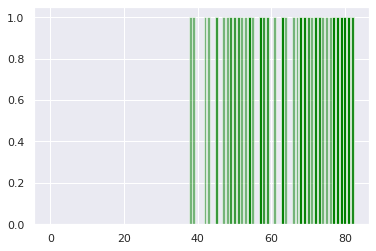

In [34]:
sns.set_theme()
sorted = dropped[['stroke', 'age']].sort_values('age')

plt.bar(sorted['age'], sorted['stroke'], color='green', alpha=0.5)

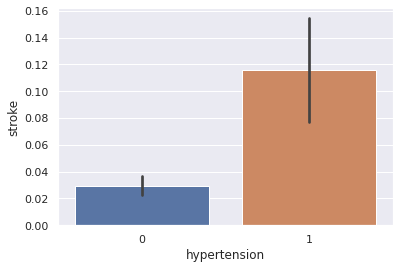

In [35]:
sns.set_theme()

sns.barplot(y = 'stroke', x = 'hypertension', data = dropped)

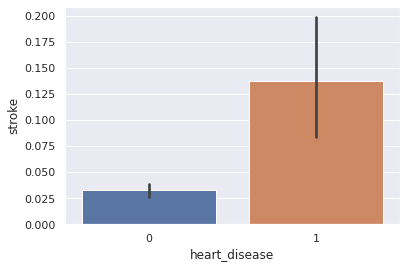

In [36]:
sns.set_theme()

sns.barplot(y = 'stroke', x = 'heart_disease', data = dropped)

<BarContainer object of 2754 artists>

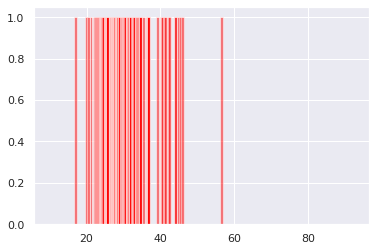

In [37]:
sorted = dropped[['stroke', 'bmi']].sort_values('bmi')

plt.bar(sorted['bmi'], sorted['stroke'], color='red', alpha=0.5)

Исходя из построенных графков мы можем сказать, что по представленным данным инсульт чаще всего происходит:


1.   С людьми у которых есть гипертения
2.   С людьми у которых есть заболевания сердца
3.   У людей старше 35
4.   У людей с индексом массы тела 20-50

